In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df = sns.load_dataset("titanic")

In [56]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [57]:
# EDA

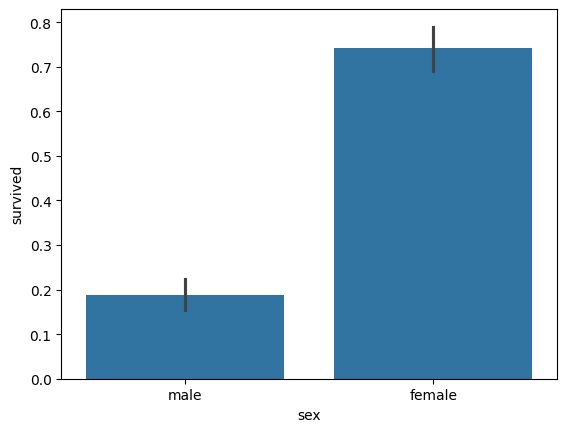

In [58]:
sns.barplot(data=df, x="sex", y="survived")
plt.show()

In [59]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

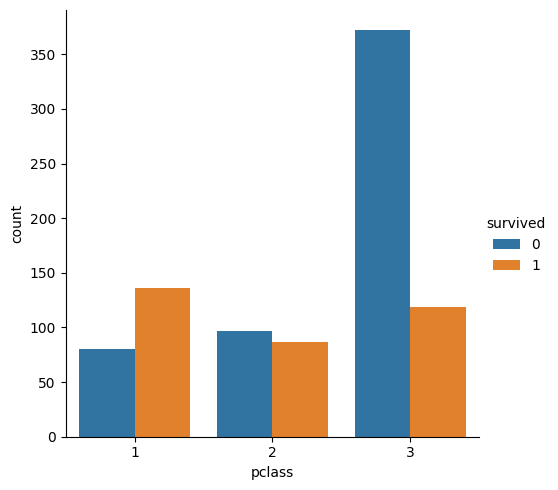

In [60]:
sns.catplot(data=df, x="pclass", hue="survived", kind="count")
plt.show()

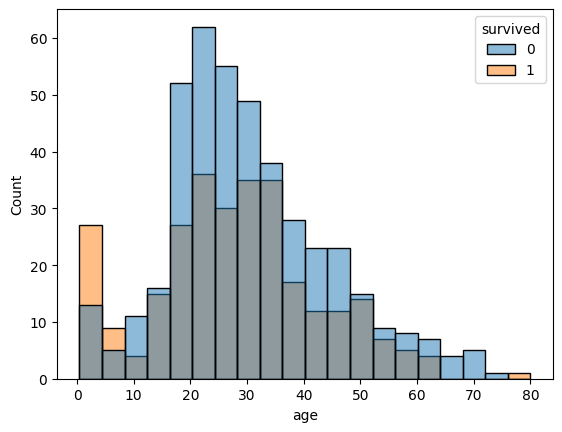

In [61]:
sns.histplot(data=df, x="age", hue="survived")
plt.show()

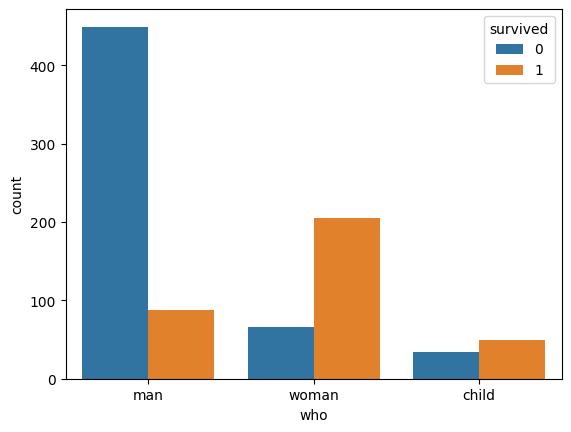

In [62]:
sns.countplot(data=df, x="who", hue="survived")
plt.show()

In [63]:
# feature engineering

In [64]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [65]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [66]:
df = df.drop(["deck", "embark_town", "alive"], axis=1)

In [67]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alone           0
dtype: int64

In [68]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [70]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [72]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [73]:
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [74]:
df["embarked"].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [75]:
df["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [76]:
df["adult_male"] = df["adult_male"].astype(int)
df["alone"] = df["alone"].astype(int)

In [77]:
X = df.drop("survived", axis=1)
y = df["survived"]

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [81]:
categorical_cols = ["sex", "class", "embarked", "who"]

preprocessor = ColumnTransformer(transformers= [
    ("cat", OneHotEncoder(drop="first", handle_unknown= "ignore"), categorical_cols)
], remainder= "passthrough"
                                )

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [82]:
encoded_cols = preprocessor.get_feature_names_out()

In [83]:
X_train = pd.DataFrame(X_train, columns = encoded_cols)
X_test = pd.DataFrame(X_test, columns = encoded_cols)

In [84]:
!pip install lightgbm

In [85]:
import lightgbm as lgb

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
clf = lgb.LGBMClassifier(verbosity = -1)
clf.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [89]:
y_pred = clf.predict(X_test)

In [90]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       128
           1       0.75      0.76      0.75        95

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.79      0.79      0.79       223

[[104  24]
 [ 23  72]]


In [96]:
importances = clf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame(
    {
        "Feature" : feature_names,
        "Importance" : importances
    }
).sort_values( by= "Importance", ascending = False)

In [97]:
feature_importances

,Feature,Importance
11,remainder__fare,1132
8,remainder__age,865
4,cat__embarked_S,81
10,remainder__parch,77
9,remainder__sibsp,65
0,cat__sex_male,60
2,cat__class_Third,51
1,cat__class_Second,41
13,remainder__alone,41
6,cat__who_woman,36


In [98]:
# hyperparameter tuning

In [99]:
from sklearn.model_selection import RandomizedSearchCV
lgb_model = lgb.LGBMClassifier(verbosity = -1)

In [101]:
param_grid=  {
    "n_estimators" : [100,300,500,1000],
    "max_depth" : [3,5,7,-1],
    "learning_rate" : [0.01,0.05, 0.1, 0.3],
    "num_leaves" : [15,31,63,127],
    "min_child_samples" : [10,20,30],
    "subsample" : [0.6, 0.8, 1.0],
    "colsample_tree" : [0.6, 0.8, 1.0]
}  

In [102]:
random_search = RandomizedSearchCV(estimator= lgb_model, param_distributions= param_grid, cv=5, scoring="accuracy", verbose =1, n_jobs=-1)

In [103]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,LGBMClassifier(verbosity=-1)
,param_distributions,"{'colsample_tree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'min_child_samples': [10, 20, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [104]:
random_search.best_params_

{'subsample': 1.0,
 'num_leaves': 127,
 'n_estimators': 1000,
 'min_child_samples': 30,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_tree': 0.6}

In [105]:
y_pred = random_search.predict(X_test)

In [106]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       137
           1       0.77      0.86      0.81        86

    accuracy                           0.85       223
   macro avg       0.84      0.85      0.84       223
weighted avg       0.85      0.85      0.85       223

[[115  22]
 [ 12  74]]
